### Inicialización del notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carga del dataset

In [3]:
# Opción para ver todas las columnas del dataset en el notebook
pd.set_option('display.max_columns', 50)

In [4]:
df = pd.read_csv('../data.csv', sep = ";")
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Interpretación de variables

Procedemos a realizar un diccionario con la traducción, interpretación y señalización de alunos puntos a tener en cuenta sobre el dataset.

In [5]:
interpretacion_de_las_variables = {
    # Categoría 1: datos bancarios
  "age": "edad",                            #(numeric)
  "job": "tipo de trabajo",                 #(categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
  "marital": "estado civil",                #(categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
  "education": "nivel educativo alcanzado", #(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
  "default": "tiene un credito en default?",#(categorical: 'no','yes','unknown')
  "housing": "tiene una hipoteca?",         #(categorical: 'no','yes','unknown')
  "loan": "tiene prestamos contraidos?",    #(categorical: 'no','yes','unknown')
    # Categoría 2: datos relativos al contacto de la campaña en cuestión. 
  "contact": "método de contacto",          #(categorical: 'cellular','telephone')  
  "month": "mes del ultimo contacto",       #(categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
  "day_of_week": "dia de la semana del ultimo contacto", #(categorical: 'mon','tue','wed','thu','fri')
  "duration": "duración en segundos del contacto",  #(numeric) - OJO con esta variable. Sí, "duration" = 0 entonces y = "no".
    # Categoría 3: otros datos 
  "campaign": "numero de contactos realizados a este cliente durante esta campaña", #(numeric, includes last contact) ¿Hay clientes repetidos?
  "pdays": "días que pasaron desde el último contacto a este cliente de otra campaña", #(numeric; 999 means client was not previously contacted) ¿Cómo trabajamos esta?
  "previous": "número de contactos realizados a este cliente antes de esta campaña",   #(numeric)
  "poutcome": "resultado de la última campaña",     #(categorical: 'failure','nonexistent','success')
    # Categoría 4: contexto social y económico 
  "emp.var.rate": "indicador trimestral de empleo",                         #(numeric)
  "cons.price.idx": "indicador mensual IPC",                                #(numeric)
  "cons.conf.idx": "indicador mensual de confianza del consumidor",         #(numeric)
  "euribor3m": "indicador diario de la tasa de prestamos interbancaria",    #(numeric)
  "nr.employed": "indicador cuatrimestral cantidad de personas empleadas",  #(numeric)

  # Categoría 5: variable objetivo
  "y" : "suscribió el cliente al plazo fijo?"   #(binary: 'yes','no') Sugiere un modelo de ajuste probit ó logit.
}

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### EDA: distribución de variable numérica, categoría 1: 'age'



La mayoría de los datos se concentran en personas de entre 30 y 60 años de edad. la diferencia de observaciones dentro de este rango de edad podría corresponderse con una selección aleatoria dentro de este rango, donde los cohortes más jóvenes tienen una mayor población que los más viejos. 

El rango de menores de 30 y mayores de 60 la canitdad de observaciones cae abruptamente. No puedo hipotetizar una técnica de selección que arroje una distribución que así se presente más que el intento de omitir estos grupos. 

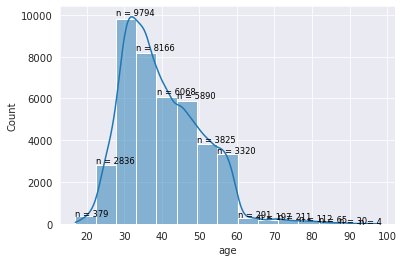

In [8]:
sns.set_style("darkgrid")

fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.histplot(data=df, x='age', kde=True, bins = 15)

for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            'n = {0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

### EDA: Distribución de variables categóricas, categoría 1: ['job','marital','education','default','housing','loan']

#### Variables categóricas, categoría 1:

In [9]:
variables_categoricas_1 = df[['job','marital','education','default','housing','loan']]
for i in variables_categoricas_1 : 
    print('For col named %s :' % i,'\n',df[i].value_counts())

For col named job : 
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
For col named marital : 
 married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
For col named education : 
 university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
For col named default : 
 no         32588
unknown     8597
yes            3
Name: default, dtype: int64
For col named housing : 
 yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
For col named loan : 
 no         33950
yes         

#### Jobs

¿Se puede encontrar una explicación a las diferencias entre cantidad de personas contactadas por profesión? ¿El banco elaboró una estrategia para contactar perfiles con mayor probabilidad previamente? ¿O respondeo a una muestra aleatoria de clientes del banco y entonces las diferencias se explican por la composición de la clientela?

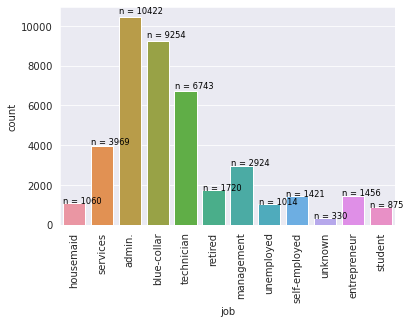

In [10]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(data=df, x='job', ax=ax)
plt.xticks(rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            'n = {0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

#### Marital

Mayoría de personas casadas.- 

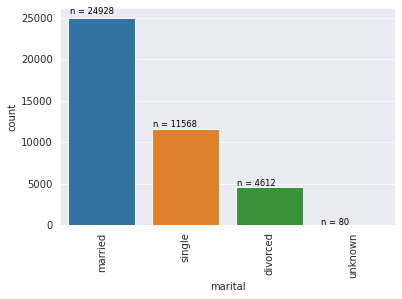

In [11]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(data=df, x='marital', ax=ax)
plt.xticks(rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            'n = {0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

#### Education

¿Tendrá relación con otras variables? ¿Con la variable trabajo?

¿Podemos investigar por qué hay 18 "iletrados"? ¿Y 1731 de los que no tenemos información?

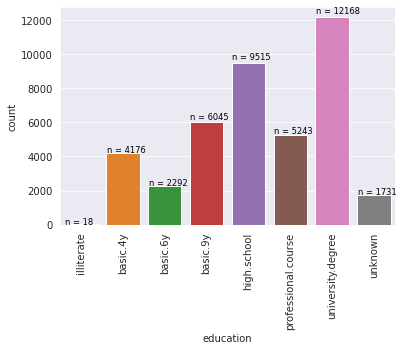

In [12]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)

category_order = ["illiterate", "basic.4y", "basic.6y", 
                  "basic.9y", "high.school", "professional.course",
                  'university.degree', 'unknown']

sns.countplot(data=df, x='education', ax=ax, order = category_order)
plt.xticks(rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            'n = {0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

#### Default

Solo tenemos certeza de que 3 personas defaultearon un crédito previamente. Pero no tenemos información sobre 8597 observaciones. 32588 observaciones no defaultearon. 

¿Podemos profundizar sobre el por qué no tenemos información sobre 8597 casos? ¿Puede haber un sesgo dependiente de otra variable aquí?


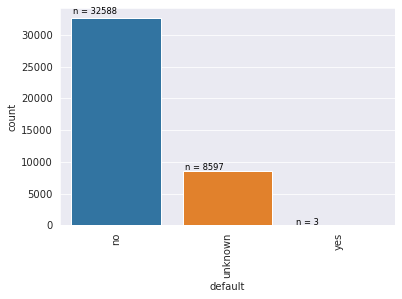

In [13]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(data=df, x='default', ax=ax)
plt.xticks(rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            'n = {0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

#### Housing

Mayotía de personas con créditos hipotecarios. 

990 observaciones de las que no tenemos información. ¿Podemos encontrar una explicación para la falta de datos? 

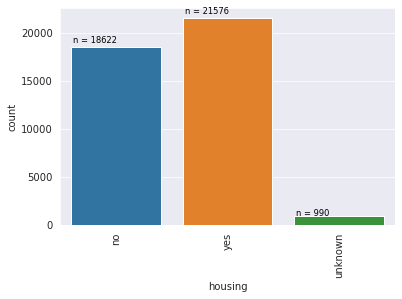

In [14]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(data=df, x='housing', ax=ax)
plt.xticks(rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            'n = {0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

#### Loan

Mayoría de personas que no contrajeron préstamos. 

Otra vez, 990 observaciones sobre las que no tenemos datos. ¿Tienen relación con las 990 observaciones de las que no sabemos si contrajo créditos hipotecarios?

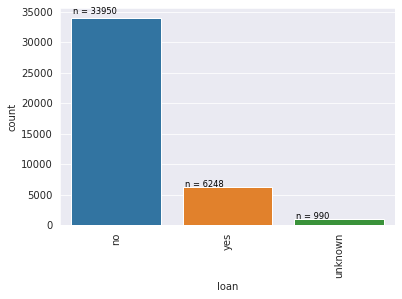

In [15]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(data=df, x='loan', ax=ax)
plt.xticks(rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            'n = {0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

#### Explorando las 990 observaciones de Loan y Housing

Hay coincidencia entre las observaciones que señalaron unkwonw en "loan" y las que señalarn unknwon en "housing". ¿A qué se debe?

In [16]:
unknown_loan_hous = df[(df['housing'] == 'unknown') & (df['loan'] == 'unknown')]
unknown_loan_hous.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 29 to 41115
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             990 non-null    int64  
 1   job             990 non-null    object 
 2   marital         990 non-null    object 
 3   education       990 non-null    object 
 4   default         990 non-null    object 
 5   housing         990 non-null    object 
 6   loan            990 non-null    object 
 7   contact         990 non-null    object 
 8   month           990 non-null    object 
 9   day_of_week     990 non-null    object 
 10  duration        990 non-null    int64  
 11  campaign        990 non-null    int64  
 12  pdays           990 non-null    int64  
 13  previous        990 non-null    int64  
 14  poutcome        990 non-null    object 
 15  emp.var.rate    990 non-null    float64
 16  cons.price.idx  990 non-null    float64
 17  cons.conf.idx   990 non-null    

### EDA: Variables categóricas, categoría 2: "contact", "month", "day of the week"

#### Variables categóricas, categoría 2: "contact", "month", "day of the week"

In [17]:
variables_categoricas_2 = df[['contact','month','day_of_week']]
for i in variables_categoricas_2 : 
    print('For col named %s :' % i,'\n',df[i].value_counts())

For col named contact : 
 cellular     26144
telephone    15044
Name: contact, dtype: int64
For col named month : 
 may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64
For col named day_of_week : 
 thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


#### Contact

Mayoría de contactos a teléfonos móviles.

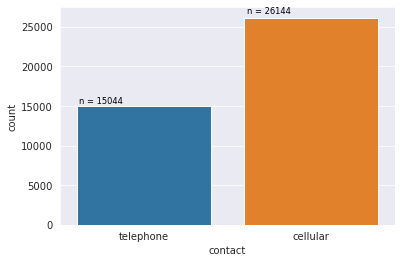

In [18]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(data=df, x='contact', ax=ax)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            'n = {0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

#### Month

Gran diferencia de observaciones entre meses. A simple vista me veo tentado a suponer que todos los meses se tratan del mismo año. Pero es llamativamente baja la cantidad de contactos en los meses de marzo, septiembre, octubre, y diciembre. Desde ya la campaña no fue lineal en cantidad de contactos. Pero además ¿vale la pena preguntar si ocurrieron en un mismo año?

**Respondido**: No se trata de un estudio de un mismo año. Transcurre durante 3 años. Podemos obtener el año del que se trata del valor del índice de precios de la observación. 

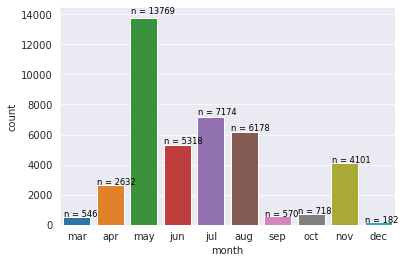

In [19]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)

month_oreder = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

sns.countplot(data=df, x='month', ax=ax, order = month_oreder)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            'n = {0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

#### Day of the week

Distribución pareja en días de la semana. ¿Han variado los contactos por día según el mes?

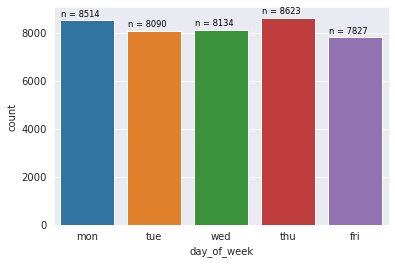

In [20]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)

day_oreder = ['mon', 'tue', 'wed', 'thu', 'fri']

sns.countplot(data=df, x='day_of_week', ax=ax, order = day_oreder)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            'n = {0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

### EDA Variable numérica categoría 2: "duration"

¿Qué tratamiento le podemos dar a esta variable? Incluye dos dimensiones. Una la duración de la llamada propiamente dicha, y otra es ¿lograron comunicarse? Si el valor es positivo, la respuesta es sí. Si el valor es 0, la respuesta es no.

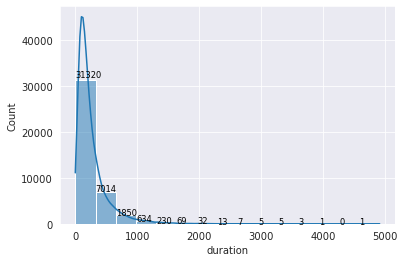

In [21]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.histplot(data= df[df['duration'] != 0], 
             x= 'duration', 
             kde=True, 
             bins = 15)

for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

Parece llamativo que existan observaciones con más de 2000 segundos de duración (34 minutos). ¿Es correcto? ¿Podrán ser errores de registro?

##### Solo 4 observaciones son iguales a cero. 

In [22]:
df[df['duration'] == 0].count()

age               4
job               4
marital           4
education         4
default           4
housing           4
loan              4
contact           4
month             4
day_of_week       4
duration          4
campaign          4
pdays             4
previous          4
poutcome          4
emp.var.rate      4
cons.price.idx    4
cons.conf.idx     4
euribor3m         4
nr.employed       4
y                 4
dtype: int64

##### Parece que hay pocas observaciones con una duración menor a 10 segundos (menos del 1% del dataset) 

Para esta indsutria/operación intuiría que es una proporción inusualmente baja. ¿Qué naturaleza tuvieron los contactos? ¿Tenían algún indicio de que iban a superar un rechazo inmediato a la presentación del agente de venta? ¿El dataset está sesgado hacia los casos más exitosos?

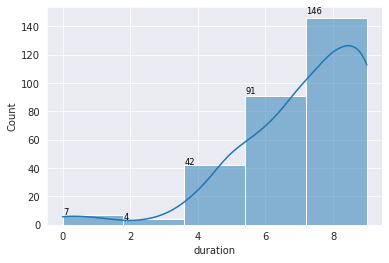

In [23]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.histplot(data= df[df['duration'] < 10], 
             x= 'duration', 
             kde=True, 
             bins = 5)

for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

### EDA variable categórica, categoría 3: "poutcome"

En su gran mayoría, no tenemos información de haber realizado una campaña anteriormente. 

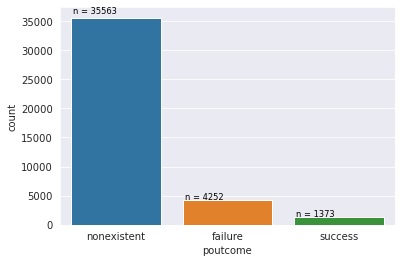

In [24]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(data=df, x='poutcome', ax=ax)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            'n = {0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

### EDA Variables numéricas categoría 3: "campaign", "pdays", "previous"

#### "Campaing"

82% de las observaciones recibieron 3 o menos contactos. 97% recibieron 10 o menos contactos. Los que recibieron más contactos... ¿A qué se debe? ¿Pueden deberse a errores de registro?

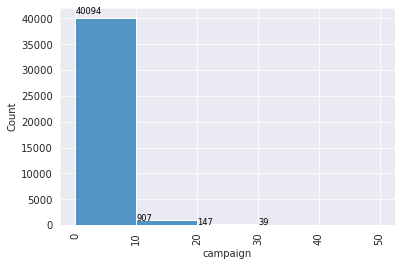

In [25]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.histplot(data= df[df["campaign"] != 0], 
             x= "campaign",
             bins = [0, 10, 20,30,50])
plt.xticks(rotation=90)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

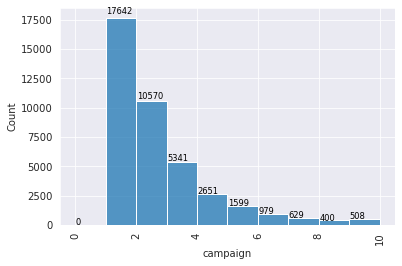

In [26]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.histplot(data= df[df["campaign"] != 0], 
             x= "campaign",
             bins = [0, 1, 2,3,4,5,6,7,8,9,10])
plt.xticks(rotation=90)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

#### "pdays"

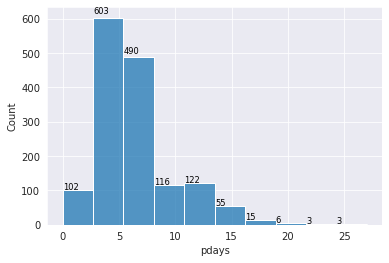

In [27]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.histplot(data= df[df['pdays'] != 999], 
             x= 'pdays', bins = 10)

for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

##### Solo 1515 observaciones que han sido contactadas en campañas previamente

In [28]:
df[df['pdays'] != 999].count()

age               1515
job               1515
marital           1515
education         1515
default           1515
housing           1515
loan              1515
contact           1515
month             1515
day_of_week       1515
duration          1515
campaign          1515
pdays             1515
previous          1515
poutcome          1515
emp.var.rate      1515
cons.price.idx    1515
cons.conf.idx     1515
euribor3m         1515
nr.employed       1515
y                 1515
dtype: int64

##### Tratamiento de la variable 'pdays'


¿Qué tratamiento le podemos dar a esta variable?
Tiene una parte categórica (pdays positivos significa que se han contacto con anterioridad con esta persona y pdays == 999 significa que NO se contactaron con anterioridad. 

¿Conviene volver "None" los valores 999? La variable deja de ser numérica.

In [29]:
# ¿Qué tratamiento le podemos dar a esta variable? 999 significa que no ha sido contactado con anterioridad. 
df['pdays'] = df.replace(['pdays'] == 999, None)

#### Previous

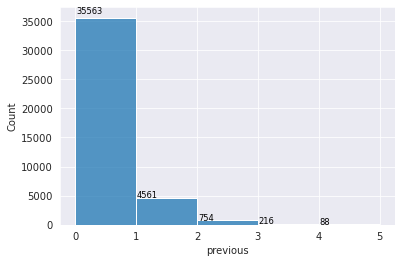

In [30]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.histplot(data= df, 
             x= 'previous', 
             bins = [0,1,2,3,4,5])

for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

### Heatmap correlaciones de variables numéricas

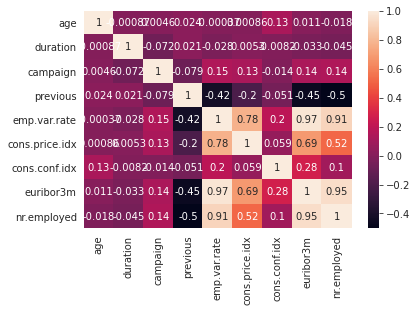

In [31]:
variables_numericas = ['age', 'duration','campaign','pdays','previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
correlaciones_numericas = df[variables_numericas].corr()
sns.heatmap(correlaciones_numericas, annot=True)
plt.show()

Fuerte correlación entre las variables numéricas "euribor3m" con 'nr.employed', 'emp.var.rate'. 

 Y 'nr.employed' con 'emp.var.rate'.

 Las correlaciones más fuertes se encuentran entonces entre variables de la categoría 4: contexto social y económico.

### Proporciones de plazos fijos adquiridos vs variables de la Categoría 1: variables categóricas.

#### Preparación de datos Categoría 1

In [32]:
df_job = df[['job','y']]
df_marital = df[['marital','y']]
df_education = df[['education','y']]
df_default = df[['default','y']]
df_housing = df[['housing','y']]
df_loan = df[['loan','y']]

df_job.info

<bound method DataFrame.info of                job    y
0        housemaid   no
1         services   no
2         services   no
3           admin.   no
4         services   no
...            ...  ...
41183      retired  yes
41184  blue-collar   no
41185      retired   no
41186   technician  yes
41187      retired   no

[41188 rows x 2 columns]>

In [33]:
job_grouped2 = df.value_counts(['job','y'])
job_grouped2 = job_grouped2.reset_index()

marital_grouped2 = df.value_counts(['marital','y'])
marital_grouped2 = marital_grouped2.reset_index()

education_grouped2 = df.value_counts(['education','y'])
education_grouped2 = education_grouped2.reset_index()

default_grouped2 = df.value_counts(['default','y'])
default_grouped2 = default_grouped2.reset_index()

housing_grouped2 = df.value_counts(['housing','y'])
housing_grouped2 = housing_grouped2.reset_index()

loan_grouped2 = df.value_counts(['loan','y'])
loan_grouped2 = loan_grouped2.reset_index()

job_grouped2.head(2)

,job,y,0
0,admin.,no,9070
1,blue-collar,no,8616


In [34]:
job_grouped3 = df.value_counts(['job'])
job_grouped3 = job_grouped3.reset_index()

marital_grouped3 = df.value_counts(['marital'])
marital_grouped3 = marital_grouped3.reset_index()

education_grouped3 = df.value_counts(['education'])
education_grouped3 = education_grouped3.reset_index()

default_grouped3 = df.value_counts(['default'])
default_grouped3 = default_grouped3.reset_index()

housing_grouped3 = df.value_counts(['housing'])
housing_grouped3 = housing_grouped3.reset_index()

loan_grouped3 = df.value_counts(['loan'])
loan_grouped3 = loan_grouped3.reset_index()

job_grouped3.head(2)

,job,0
0,admin.,10422
1,blue-collar,9254


In [35]:
jobs_grouped = job_grouped2.merge(job_grouped3, on='job', how = 'left')
jobs_grouped = jobs_grouped.rename(columns = {'0_x' : 'result', 
                                              '0_y' : 'total'})

marital_grouped = marital_grouped2.merge(marital_grouped3, on='marital', how = 'left')
marital_grouped = marital_grouped.rename(columns = {'0_x' : 'result', 
                                              '0_y' : 'total'})

education_grouped = education_grouped2.merge(education_grouped3, on='education', how = 'left')
education_grouped = education_grouped.rename(columns = {'0_x' : 'result', 
                                              '0_y' : 'total'})

default_grouped = default_grouped2.merge(default_grouped3, on='default', how = 'left')
default_grouped = default_grouped.rename(columns = {'0_x' : 'result', 
                                              '0_y' : 'total'})

housing_grouped = housing_grouped2.merge(housing_grouped3, on='housing', how = 'left')
housing_grouped = housing_grouped.rename(columns = {'0_x' : 'result', 
                                              '0_y' : 'total'})

loan_grouped = loan_grouped2.merge(loan_grouped3, on='loan', how = 'left')
loan_grouped = loan_grouped.rename(columns = {'0_x' : 'result', 
                                              '0_y' : 'total'})
jobs_grouped.head(3)

,job,y,result,total
0,admin.,no,9070,10422
1,blue-collar,no,8616,9254
2,technician,no,6013,6743


In [36]:
jobs_grouped['proportion'] = (jobs_grouped['result']/jobs_grouped['total'])

marital_grouped['proportion'] = (marital_grouped['result']/marital_grouped['total'])

education_grouped['proportion'] = (education_grouped['result']/education_grouped['total'])

default_grouped['proportion'] = (default_grouped['result']/default_grouped['total'])

housing_grouped['proportion'] = (housing_grouped['result']/housing_grouped['total'])

loan_grouped['proportion'] = (loan_grouped['result']/loan_grouped['total'])

jobs_grouped.head(2)

,job,y,result,total,proportion
0,admin.,no,9070,10422,0.870274
1,blue-collar,no,8616,9254,0.931057


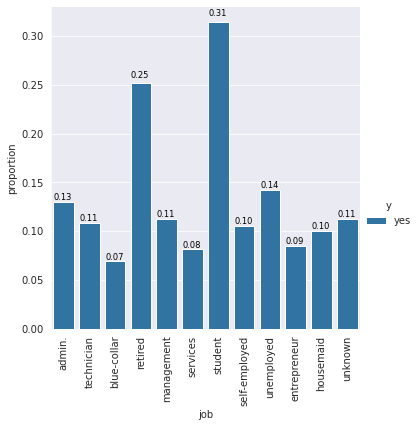

In [37]:
# Create a bar plot of interest in math, separated by gender
g = sns.catplot(x="job", 
            y="proportion", 
            hue = 'y',
            data = jobs_grouped[jobs_grouped['y'] == 'yes'], 
            kind="bar",)
plt.xticks(rotation=90)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

#### Gráficos proporciones de plazos fijos adquiridos vs variables de la Categoría 1: variables categóricas.

#### Jobs

Encontramos en las categorías de "Jobs" una sugerencia de que lxs individuxs de los que tenemos valores "retired" y "student" son más propensos a adquirir un plazo fijo.

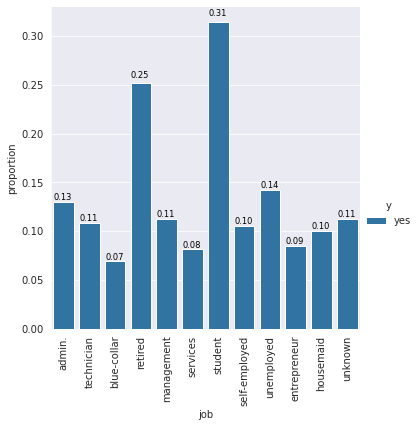

In [38]:
g = sns.catplot(x="job", 
            y="proportion", 
            hue = 'y',
            data = jobs_grouped[jobs_grouped['y'] == 'yes'], 
            kind="bar",)
plt.xticks(rotation=90)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

#### Marital

Encontramos en las categorías de "Marital" una sugerencia de que lxs individuxs de los que tenemos valores "single" y "unknown" son más propensos a adquirir un plazo fijo.

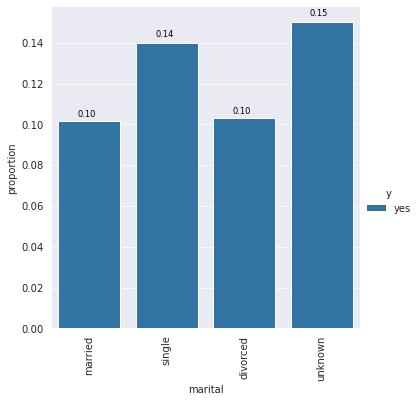

In [39]:
g = sns.catplot(x="marital", 
            y="proportion", 
            hue = 'y',
            data = marital_grouped[marital_grouped['y'] == 'yes'], 
            kind="bar",)
plt.xticks(rotation=90)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.25, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

#### Education

Encontramos en las categorías de "Marital" una sugerencia de que lxs individuxs de los que tenemos valores "single" y "unknown" son más propensos a adquirir un plazo fijo.

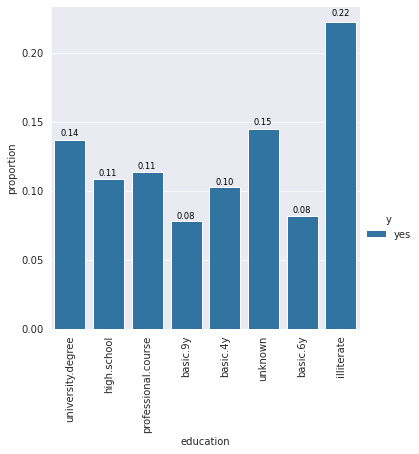

In [40]:
g = sns.catplot(x="education", 
            y="proportion", 
            hue = 'y',
            data = education_grouped[education_grouped['y'] == 'yes'], 
            kind="bar",)
plt.xticks(rotation=90)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

#### Default

Encontramos en las categorías de "Default" una sugerencia de que lxs individuxs de los que tenemos valores "no" (no entraron en sececión de pagos) son más propensos a adquirir un plazo fijo.

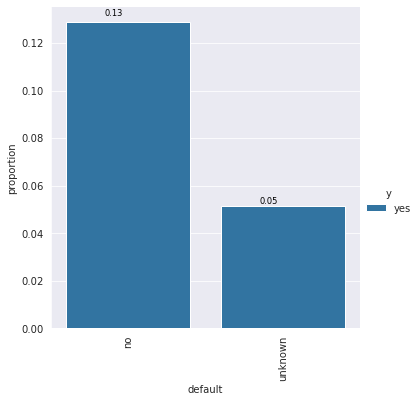

In [41]:
g = sns.catplot(x="default", 
            y="proportion", 
            hue = 'y',
            data = default_grouped[default_grouped['y'] == 'yes'], 
            kind="bar",)
plt.xticks(rotation=90)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.25, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

#### Housing

Encontramos en las categorías de "Housing" una sugerencia de que no hay una inclinación clara a tomar o no un plazo fijo dependiendo de si adquirieron en el pasado una hipoteca. 

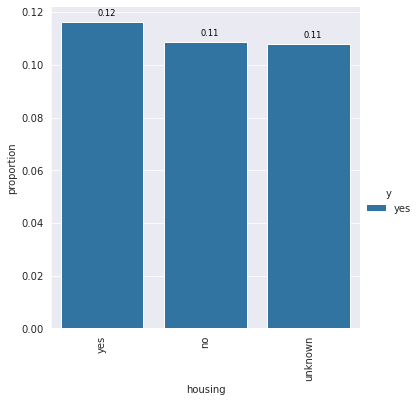

In [42]:
g = sns.catplot(x="housing", 
            y="proportion", 
            hue = 'y',
            data = housing_grouped[housing_grouped['y'] == 'yes'], 
            kind="bar",)
plt.xticks(rotation=90)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.35, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

#### Loan

Encontramos en las categorías de "Loan" una sugerencia de que no hay una inclinación clara a tomar o no un plazo fijo dependiendo de si adquirieron en el pasado un préstamo. 

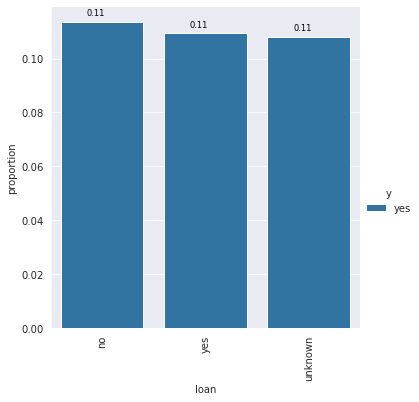

In [43]:
g = sns.catplot(x="loan", 
            y="proportion", 
            hue = 'y',
            data = loan_grouped[loan_grouped['y'] == 'yes'], 
            kind="bar",)
plt.xticks(rotation=90)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.25, 
            p.get_height() * 1.02, 
            '{0:.2f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='small')

plt.show()

## Preguntas e hipótesis

1. ¿Es la edad un factor significativo?
2. ¿Influye el nivel de educación?
3. ¿Entre qué variables hay correlación?
4. ¿Cómo se encuentra la situacion crediticia de los clientes?
5. ¿Un aumento de euribor3m, aumenta la probabilidad de adquisición de plazo fijo?
6. ¿Le convenía al usuario adquirir un plazo fijo?

In [44]:
# Transformo la variable target para calcular P-Value
def factorize_y(x):
    if x == 'no':
        return 0
    else:
        return 1
    
df['y'] = df.apply(lambda x: factorize_y(x['y']), axis=1)

### 1. ¿Es la edad un factor significativo? 
H0 = La edad no es un factor significativo a la hora de predecir si el cliente adquirira un plazo fijo.\
H1 = La edad si es un factor significativo a la hora de predecir si el cliente adquirira un plazo fijo.

Se va a utilizar P-Value para determinar si la edad es un valor significativo. Si P-Value <= .05, se rechaza la hipotesis nula.
Y si P-Valu > .05, no se rechaza la hipotesis nula. En el caso que P-Value < .05, NO significa que la hipotesis alternativa sea
95% probable.

In [45]:
from scipy import stats

r, p = stats.pearsonr(df.age, df.y)
print('Coeficiente de pearson: ', r)
print('P-Value: ', format(p, '.11f'))

Coeficiente de pearson:  0.030398803040003714
P-Value:  0.00000000068


In [46]:
sample = df.sample(10000).copy()

In [47]:
print('La media de edad de la muestra es', sample.age.mean())
print('La desviacion estandar de edad de la poblacion es', df.age.std())
ci = round(1.96 * (df.age.std()/np.sqrt(10000)), 3)
print(f'El intervalo de confiaza es {sample.age.mean()} +/-{ci}')

La media de edad de la muestra es 39.9765
La desviacion estandar de edad de la poblacion es 10.421249980934048
El intervalo de confiaza es 39.9765 +/-0.204


In [48]:
edad = pd.DataFrame({'si': df.loc[df.y == 1].groupby('age').y.agg('count'), 'no': df.loc[df.y == 0].groupby('age').y.agg('count'),'total':df.groupby('age').y.agg('count')})
edad.fillna(0)
edad.reset_index(level=0, inplace=True)
def get_probs(x):
    return x['si'] / x['total']
edad['probabilidad_si'] = edad.apply(lambda x: get_probs(x), axis=1)
edad['probabilidad_no'] = 1 - edad['probabilidad_si']
edad.fillna(0)

,age,si,no,total,probabilidad_si,probabilidad_no
0,17,2.0,3.0,5,0.400000,0.600000
1,18,12.0,16.0,28,0.428571,0.571429
2,19,20.0,22.0,42,0.476190,0.523810
3,20,23.0,42.0,65,0.353846,0.646154
4,21,29.0,73.0,102,0.284314,0.715686
...,...,...,...,...,...,...
73,91,0.0,2.0,2,0.000000,0.000000
74,92,3.0,1.0,4,0.750000,0.250000
75,94,0.0,1.0,1,0.000000,0.000000
76,95,0.0,1.0,1,0.000000,0.000000


<AxesSubplot:xlabel='age', ylabel='probabilidad_no'>

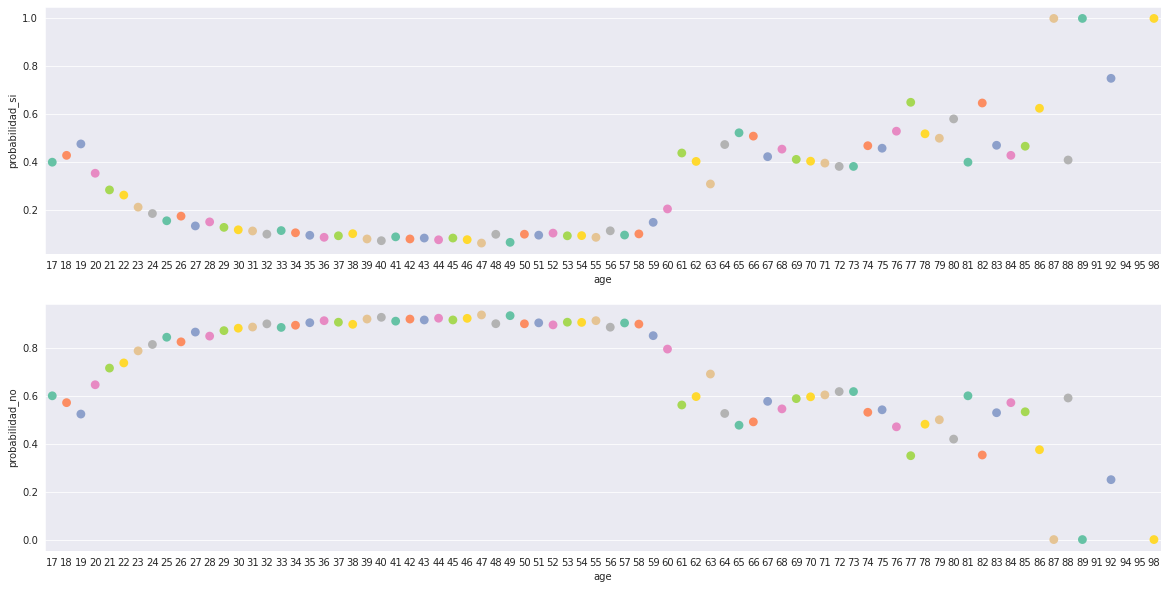

In [49]:
fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(20,10))
sns.pointplot(x='age', y='probabilidad_si', data=edad, join=False, palette='Set2', ax=axs[0])
sns.pointplot(x='age', y='probabilidad_no', data=edad, join=False, palette='Set2', ax=axs[1])

**Respuesta**\
P-Value < .001. Por lo que, se rechaza la hipotesis nula (H0). Además, se puede decir que estamos 95% seguros de que la media de edad es 39.9074 +/-0.204. \
Cuando la edad > 58 años, la probabilidad de adquirir un plazo fijo aumenta de manera considerable.

### 2. ¿Influye el nivel de educación?
Hipotesis a responder: \
H0: El nivel educativo no afecta la adquisición de plazo fijos.\
H1: El nivel educativo si afecta la adquisicion de plazo fijos.

In [50]:
df.education.replace({'unknown': 'desconocido',
            'illiterate': 'ninguno',
            'basic.4y': 'primario',
           'basic.6y':'primario',
           'basic.9y': 'primario',
           'high.school':'secundario',
           'professional.course':'terciario',
           'university.degree':'universitario'}, inplace=True)
df.education.value_counts()

primario         12513
universitario    12168
secundario        9515
terciario         5243
desconocido       1731
ninguno             18
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

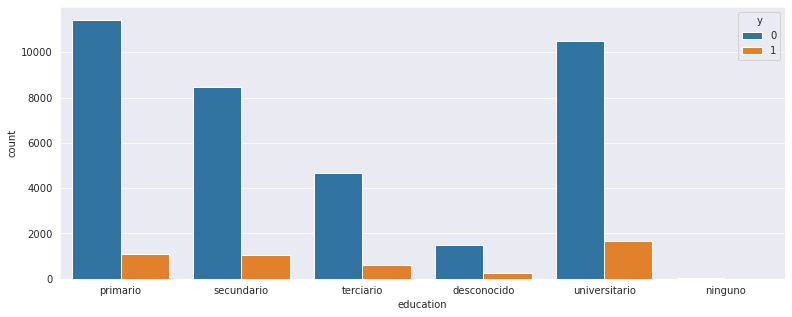

In [51]:
fig, axs = plt.subplots(figsize=(13,5))
sns.countplot(data=df, x='education', hue='y')

In [52]:
education = pd.DataFrame({'si': df.loc[df.y == 1].groupby('education').y.agg('count'), 'no': df.loc[df.y == 0].groupby('education').y.agg('count'),'total':df.groupby('education').y.agg('count')})
def get_probs(x):
    return x['si'] / x['total']
education.reset_index(level=0, inplace=True)
education['probabilidad_si'] = education.apply(lambda x: get_probs(x), axis=1)
education['probabilidad_no'] = 1 - education['probabilidad_si']
education

,education,si,no,total,probabilidad_si,probabilidad_no
0,desconocido,251,1480,1731,0.145003,0.854997
1,ninguno,4,14,18,0.222222,0.777778
2,primario,1089,11424,12513,0.087029,0.912971
3,secundario,1031,8484,9515,0.108355,0.891645
4,terciario,595,4648,5243,0.113485,0.886515
5,universitario,1670,10498,12168,0.137245,0.862755


<AxesSubplot:xlabel='education', ylabel='probabilidad_no'>

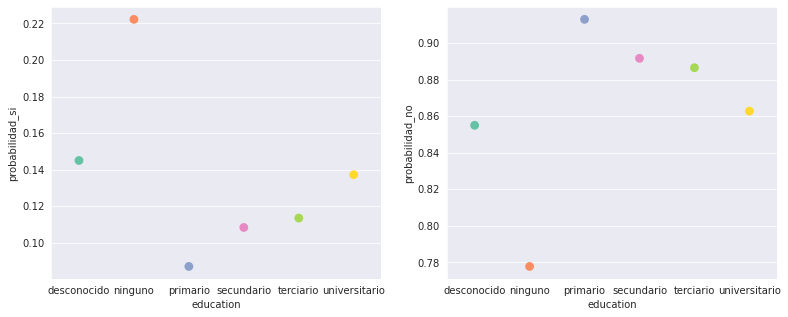

In [53]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(13,5))
sns.pointplot(x='education', y='probabilidad_si', data=education, join=False, palette='Set2', ax=axs[0])
sns.pointplot(x='education', y='probabilidad_no', data=education, join=False, palette='Set2', ax=axs[1])

**Respuesta** \
Como se puede apreciar, el nivel de educacion de los usuarios si influye en la adquisición de plazos fijos. A medida que aumenta el nivel educativo, aumentan las probabilidades de adquirir un plazo fijo

### 3. ¿Entre qué variables hay correlación?

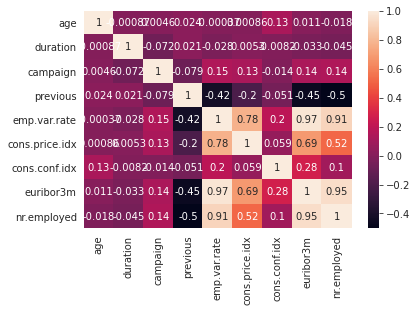

In [54]:
variables_numericas = ['age', 'duration','campaign','pdays','previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
correlaciones_numericas = df[variables_numericas].corr()
sns.heatmap(correlaciones_numericas, annot=True)
plt.show()

Fuerte correlación entre las variables numéricas "euribor3m" con 'nr.employed', 'emp.var.rate'. 

 Y 'nr.employed' con 'emp.var.rate'.

 Las correlaciones más fuertes se encuentran entonces entre variables de la categoría 4: contexto social y económico.

### 4. ¿Cómo se encuentra la situacion crediticia de los clientes?
En esta pregunta, se intentara encontrar la relación entre las 3 variables bancarias (loan - housing - default). Es interesante, ya que, se va a poder apreciar si la persona es responsable cuando adquiere obligaciones financieras.

In [55]:
df.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [56]:
def productos_financieros(x):
    if x.loan == 'yes' or x.housing == 'yes':
        return 'yes'
    elif x.loan == 'unknown' or x.housing == 'unknown':
        return 'unknown'
    else:
        return 'no'
df['productos_financieros'] = df.apply(lambda x: productos_financieros(x), axis=1)

[Text(0.5, 0, 'morosos')]

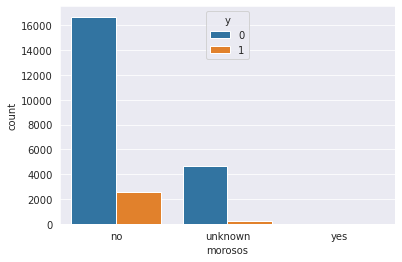

In [57]:
# Grafico que muestra la cantidad de gente que tiene productos financieros
sns.countplot(data=df.loc[df.productos_financieros == 'yes'], x='default', hue='y').set(xlabel='morosos')

**Respuesta**\
Se puede observar que la gente mayoria de la gente que contrajo obligaciones financieras, no poseen moras.

### 5. ¿Un aumento de euribor3m, aumenta la probabilidad de adquisición de plazo fijo?

<AxesSubplot:xlabel='euribor3m'>

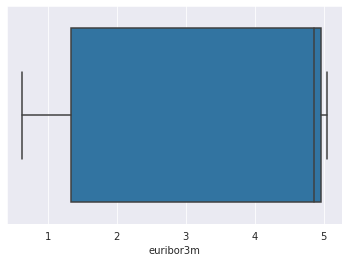

In [66]:
sns.boxplot(data=df, x='euribor3m')

In [59]:
df['euribor3m'] = df['euribor3m'].astype('float64')

In [60]:
def group_euribor3m(x):
    try:
        if x.euribor3m >= 0 and x.euribor3m < 1:
            return '[0-1]'
        elif x.euribor3m >= 1 and x.euribor3m < 2:
            return '[1-2]'
        elif x.euribor3m >= 2 and x.euribor3m < 3:
            return '[2-3]'
        elif x.euribor3m >= 3 and x.euribor3m < 4:
            return '[3-4]'
        elif x.euribor3m >= 4 and x.euribor3m < 5:
            return '[4-5]'
        elif x.euribor3m >= 5 and x.euribor3m < 6:
            return '[5-6]'
    except:
        print('error',x.euribor3m)
    
df['euribor3m_group'] = df.apply(lambda x: group_euribor3m(x), axis=1)

In [67]:
euribor3m = pd.DataFrame({'si': df.loc[df.y == 1].groupby('euribor3m_group').y.agg('count'), 'no': df.loc[df.y == 0].groupby('euribor3m_group').y.agg('count'),'total':df.groupby('euribor3m_group').y.agg('count')})
def get_probs(x):
    return x['si'] / x['total']
euribor3m.reset_index(level=0, inplace=True)
euribor3m['probabilidad_si'] = euribor3m.apply(lambda x: get_probs(x), axis=1)
euribor3m['probabilidad_no'] = 1 - euribor3m['probabilidad_si']
euribor3m

,euribor3m_group,si,no,total,probabilidad_si,probabilidad_no
0,[0-1],1778,2112,3890,0.457069,0.542931
1,[1-2],1523,8085,9608,0.158514,0.841486
2,[3-4],1,13,14,0.071429,0.928571
3,[4-5],1330,26330,27660,0.048084,0.951916
4,[5-6],8,8,16,0.500000,0.500000


In [68]:
df.euribor3m_group.value_counts()

[4-5]    27660
[1-2]     9608
[0-1]     3890
[5-6]       16
[3-4]       14
Name: euribor3m_group, dtype: int64

<AxesSubplot:xlabel='euribor3m_group', ylabel='probabilidad_no'>

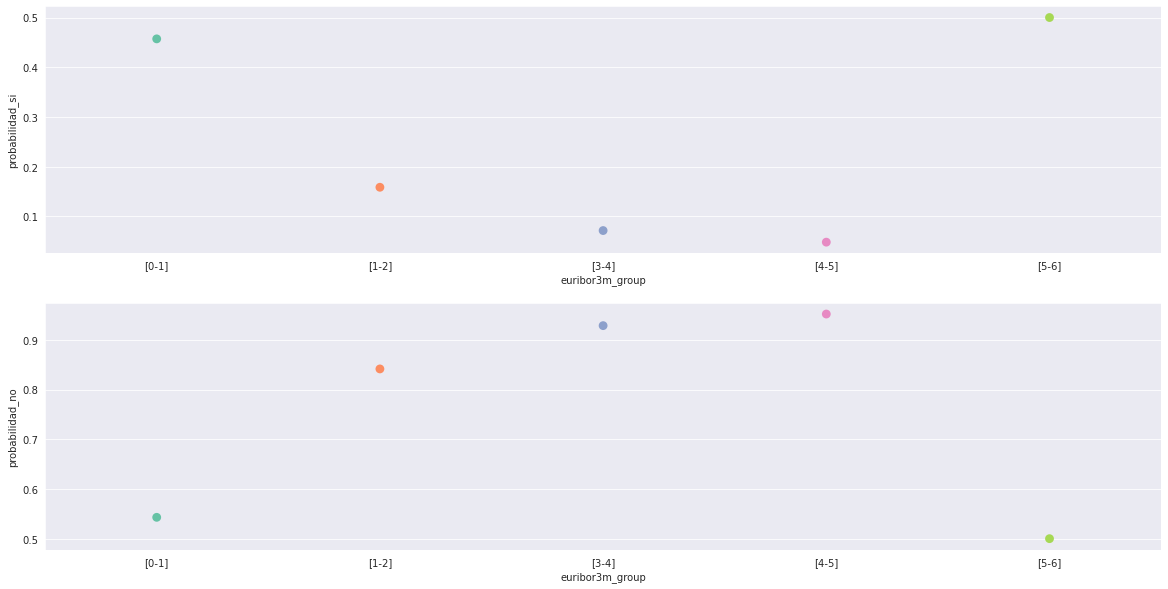

In [69]:
fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(20,10))
sns.pointplot(x='euribor3m_group', y='probabilidad_si', data=euribor3m, join=False, palette='Set2', ax=axs[0])
sns.pointplot(x='euribor3m_group', y='probabilidad_no', data=euribor3m, join=False, palette='Set2', ax=axs[1])

In [70]:
sample = df.loc[df.euribor3m_group == '[3-4]'].sample(n=4).copy()
sample

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,productos_financieros,euribor3m_group
27683,37,admin.,married,secundario,no,yes,no,telephone,dec,fri,12,1,37,0,nonexistent,-0.2,92.756,-45.9,3.563,5176.3,0,yes,[3-4]
27681,39,housemaid,married,primario,no,yes,no,telephone,dec,wed,11,1,39,1,failure,-0.2,92.756,-45.9,3.743,5176.3,0,yes,[3-4]
27679,27,admin.,single,secundario,no,yes,no,telephone,nov,fri,24,1,27,0,nonexistent,-0.1,93.200,-42.0,3.853,5195.8,0,yes,[3-4]
27688,55,unemployed,divorced,terciario,no,no,no,telephone,dec,fri,136,1,55,0,nonexistent,-0.2,92.756,-45.9,3.282,5176.3,0,no,[3-4]


In [71]:
print('La media de edad de la muestra es', sample.euribor3m.mean())
print('La desviacion estandar de edad de la poblacion es', df.euribor3m.std())
ci = round(1.96 * (df.euribor3m.std()/np.sqrt(4)), 3)
print(f'El intervalo de confiaza es {sample.euribor3m.mean()} +/-{ci}')

La media de edad de la muestra es 3.61025
La desviacion estandar de edad de la poblacion es 1.734447404851267
El intervalo de confiaza es 3.61025 +/-1.7


**Respuesta**\
Se puede observar que con el aumento de la tasa de interes en los bancos, no aumenta la probabilidad de adquirir un plazo fijo. El unico problema es que los rangos [3-4] y [5-6] poseen menos de 100 registros cada uno, por lo que, la probabilidad no sería muy precisa. Además en los dos rangos, previamente mencionados, la significancia estadística es muy chica, por la cantidad de registros.

### 6. ¿Le convenía al usuario adquirir un plazo fijo?
En esta pregunta, se intentara saber si al usuario le convenía adquirir un plazo fijo o no. Esto resulta interesante, ya que, vamos a poder "pensar" desde el lado del usuario. \
Para saber si le convenia al cliente, vamos a ver si la tasa de interes que le ofrecían al cliente era mayor que la inflación (Indice de Precios del Consumidor, IPC). En caso contrario, no le conviene porque la inflación le licuaria los intereses ganados.

<AxesSubplot:xlabel='month', ylabel='y'>

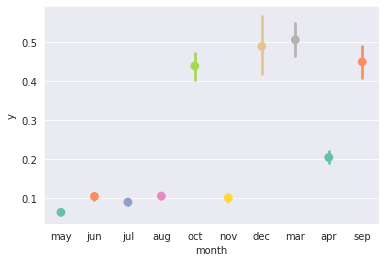

In [72]:
sns.pointplot(x='month', y='y', data=df, join=False, palette='Set2', )